# Loan credit classification problem (https://www.kaggle.com/c/titanic)
**The public dataset "German credit data" can be accessed from https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data). It contains data from 1000 customers who had access to a loan: 20 attributes (7 numerical, 13 categorical) describing the customers (ex. highly relevant information such as the purpose of the loan, the amount of savings, the job situation), and the information on whether they were able to repay the debt or not (default). About 300 instances contain customers who defaulted, about 700 instances contain customers who repaid their debt.
The aim is to train a machine learning model to predict with the best possible accuracy which customers will default. We will do this by exloiting various methods such as logistic regression, neural networks, random forests and extreme gradient boosting in python scikit-learn library.**
    

**Attributes description:**

Attribute 1: (qualitative)<br>
**Status of existing checking account**<br>
A11 : ... < 0 DM<br>
A12 : 0 <= ... < 200 DM<br>
A13 : ... >= 200 DM / salary assignments for at least 1 year<br>
A14 : no checking account

Attribute 2: (numerical)<br>
**Duration in month**

Attribute 3: (qualitative)<br>
**Credit history**<br>
A30 : no credits taken/ all credits paid back duly<br>
A31 : all credits at this bank paid back duly<br>
A32 : existing credits paid back duly till now<br>
A33 : delay in paying off in the past<br>
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)<br>
**Purpose**<br>
A40 : car (new)<br>
A41 : car (used)<br>
A42 : furniture/equipment<br>
A43 : radio/television<br>
A44 : domestic appliances<br>
A45 : repairs<br>
A46 : education<br>
A47 : (vacation - does not exist?)<br>
A48 : retraining<br>
A49 : business<br>
A410 : others

Attribute 5: (numerical)<br>
**Credit amount**

Attibute 6: (qualitative)<br>
**Savings account/bonds**<br>
A61 : ... < 100 DM<br>
A62 : 100 <= ... < 500 DM<br>
A63 : 500 <= ... < 1000 DM<br>
A64 : .. >= 1000 DM<br>
A65 : unknown/ no savings account

Attribute 7: (qualitative)<br>
**Present employment since**<br>
A71 : unemployed<br>
A72 : ... < 1 year<br>
A73 : 1 <= ... < 4 years<br>
A74 : 4 <= ... < 7 years<br>
A75 : .. >= 7 years

Attribute 8: (numerical)<br>
**Installment rate in percentage of disposable income**

Attribute 9: (qualitative)<br>
**Personal status and sex**<br>
A91 : male : divorced/separated<br>
A92 : female : divorced/separated/married<br>
A93 : male : single<br>
A94 : male : married/widowed<br>
A95 : female : single

Attribute 10: (qualitative)<br>
**Other debtors / guarantors**<br>
A101 : none<br>
A102 : co-applicant<br>
A103 : guarantor

Attribute 11: (numerical)<br>
**Present residence since**

Attribute 12: (qualitative)<br>
**Property**<br>
A121 : real estate<br>
A122 : if not A121 : building society savings agreement/ life insurance<br>
A123 : if not A121/A122 : car or other, not in attribute 6<br>
A124 : unknown / no property

Attribute 13: (numerical)<br>
**Age in years**

Attribute 14: (qualitative)<br>
**Other installment plans**<br>
A141 : bank<br>
A142 : stores<br>
A143 : none

Attribute 15: (qualitative)<br>
**Housing**<br>
A151 : rent<br>
A152 : own<br>
A153 : for free

Attribute 16: (numerical)<br>
**Number of existing credits at this bank**

Attribute 17: (qualitative)<br>
**Job**<br>
A171 : unemployed/ unskilled - non-resident<br>
A172 : unskilled - resident<br>
A173 : skilled employee / official<br>
A174 : management/ self-employed/<br>
highly qualified employee/ officer

Attribute 18: (numerical)<br>
**Number of people being liable to provide maintenance for**

Attribute 19: (qualitative)<br>
**Telephone**<br>
A191 : none<br>
A192 : yes, registered under the customers name

Attribute 20: (qualitative)<br>
**foreign worker**<br>
A201 : yes<br>
A202 : no 

**Import useful modules:**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier

**Set the number of runs for cross-validation, and the number of train and cross-validation examples** 

In [2]:
num_runs = 10

num_train = 800
num_cv = 200
train_file = "credit_german.csv"

**Load dataset into pandas dataframe x:**

In [3]:
x = pd.read_csv(train_file, sep=',')

**Quick inspection of dataframe:**

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Status_Checking_Acc            1000 non-null object
Duration_in_Months             1000 non-null int64
Credit_History                 1000 non-null object
Purposre_Credit_Taken          1000 non-null object
Credit_Amount                  1000 non-null int64
Savings_Acc                    1000 non-null object
Years_At_Present_Employment    1000 non-null object
Inst_Rt_Income                 1000 non-null int64
Marital_Status_Gender          1000 non-null object
Other_Debtors_Guarantors       1000 non-null object
Current_Address_Yrs            1000 non-null int64
Property                       1000 non-null object
Age                            1000 non-null int64
Other_Inst_Plans               1000 non-null object
Housing                        1000 non-null object
Num_CC                         1000 non-null int64
Job                            1000 non-null object
Dependents      

In [5]:
x.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [6]:
x.describe() # statistical descriptors for every column (only numerical variables)

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.299000,1.0
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458049,0.0
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,1.0
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.0
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.0
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.0
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.0


**In order to apply machine learning methods for prediction, we need to convert all categorical variables to numerical ones. Morevoer, we need to look at how many examples there are for every category and merge categories that contain few examples, as these would be noisy and would not be a reliable predictor.**

**We look for example at the variable 'Job' using plotting module Seaborn:**

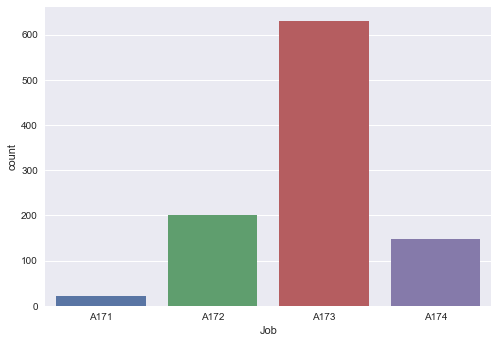

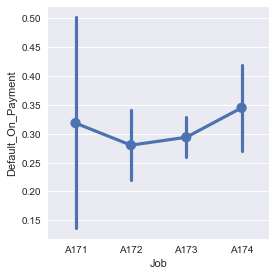

In [7]:
sns.countplot(x='Job',data=x, order=sorted(x['Job'].unique()))
plt.show()

sns.factorplot(x='Job',y='Default_On_Payment',data=x,order=sorted(x['Job'].unique()))
plt.show()

**In this case, we see that the first category (A171 - unemployed/ unskilled - non-resident) contains very few examples. As a result, the average percentage of defaults calculated for this category is affected by a very large uncertainty. Therefore, we decide to merge it with category A172 - unskilled - resident). In addition, we assign an integer to each distinct category so as to transform this into a numerical variable:**

In [8]:
x.loc[x['Job']=='A171','Job'] = 'A172'
x['Job'] = x['Job'].astype('category')
x['Job'] = x['Job'].cat.codes

In [9]:
x['Job'].head()

0    1
1    1
2    0
3    1
4    1
Name: Job, dtype: int8

**We now repeat this procedure for every categorical variable, and merge categories whenever needed:**

In [10]:
x.loc[x['Status_Checking_Acc']=='A13','Status_Checking_Acc'] = 'A14'
x['Status_Checking_Acc'] = x['Status_Checking_Acc'].astype('category')
x['Status_Checking_Acc'] = x['Status_Checking_Acc'].cat.codes

x.loc[x['Credit_History']=='A31','Credit_History'] = 'A30'
x['Credit_History'] = x['Credit_History'].astype('category')
x['Credit_History'] = x['Credit_History'].cat.codes

x.loc[x['Purposre_Credit_Taken']=='A48','Purposre_Credit_Taken'] = 'A41'
x.loc[x['Purposre_Credit_Taken']=='A44','Purposre_Credit_Taken'] = 'A46'
x.loc[x['Purposre_Credit_Taken']=='A45','Purposre_Credit_Taken'] = 'A46'
x.loc[x['Purposre_Credit_Taken']=='A410','Purposre_Credit_Taken'] = 'A46'
x['Purposre_Credit_Taken'] = x['Purposre_Credit_Taken'].astype('category')
x['Purposre_Credit_Taken'] = x['Purposre_Credit_Taken'].cat.codes

x.loc[x['Savings_Acc']=='A64','Savings_Acc'] = 'A63'
x['Savings_Acc'] = x['Savings_Acc'].astype('category')
x['Savings_Acc'] = x['Savings_Acc'].cat.codes

x.loc[x['Years_At_Present_Employment']=='A71','Years_At_Present_Employment'] = 'A72'
x['Years_At_Present_Employment'] = x['Years_At_Present_Employment'].astype('category')
x['Years_At_Present_Employment'] = x['Years_At_Present_Employment'].cat.codes

x['Marital_Status_Gender'] = x['Marital_Status_Gender'].astype('category')
x['Marital_Status_Gender'] = x['Marital_Status_Gender'].cat.codes

x['Other_Debtors_Guarantors'] = x['Other_Debtors_Guarantors'].astype('category')
x['Other_Debtors_Guarantors'] = x['Other_Debtors_Guarantors'].cat.codes

x['Property'] = x['Property'].astype('category')
x['Property'] = x['Property'].cat.codes

x['Other_Inst_Plans'] = x['Other_Inst_Plans'].astype('category')
x['Other_Inst_Plans'] = x['Other_Inst_Plans'].cat.codes

x['Housing'] = x['Housing'].astype('category')
x['Housing'] = x['Housing'].cat.codes

x['Telephone'] = x['Telephone'].astype('category') # looks like a not very useful feature
x['Telephone'] = x['Telephone'].cat.codes

x['Foreign_Worker'] = x['Foreign_Worker'].astype('category')
x['Foreign_Worker'] = x['Foreign_Worker'].cat.codes

**Numerical variables also need inspection, to check whether some pre-processing is needed. For example, let us consider the 'Duration_in_Months' variable:**

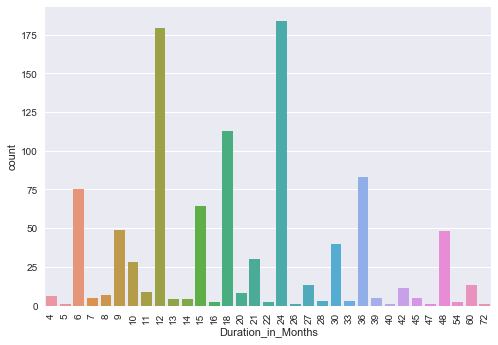

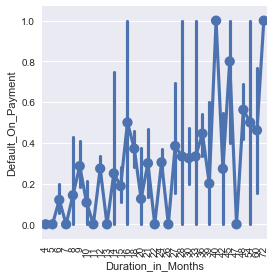

In [11]:
sns.countplot(x='Duration_in_Months',data=x, order=sorted(x['Duration_in_Months'].unique()))
plt.xticks(rotation=90)
plt.show()

sns.factorplot(x='Duration_in_Months',y='Default_On_Payment',data=x,order=sorted(x['Duration_in_Months'].unique()))
plt.xticks(rotation=90)
plt.show()

**It looks very noisy, as some of the values for 'Duration_in_Months' contain very few examples. Therefore, it is better to put the values into larger bins, as using the raw data could lead to model overfitting. Using 5 years bins seem like a reasonable choice:**

In [12]:
x.loc[x['Duration_in_Months']>50, 'Duration_in_Months'] = 50 # as very few cases above 50 months

labels = [ "{0} - {1}".format("%02d" % i, "%02d" % (i + 4)) for i in range(0, 55, 5) ]
x['Duration_in_Months'] = pd.cut(x['Duration_in_Months'], range(0, 60, 5), right=False, labels=labels)

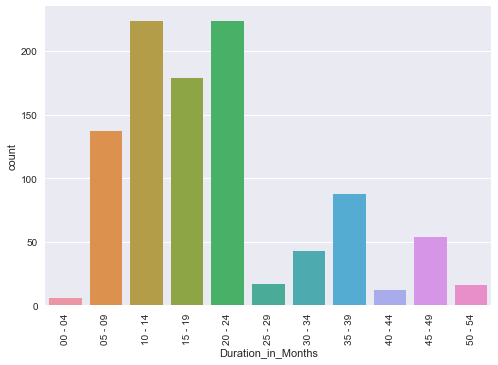

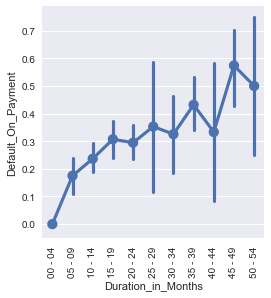

In [13]:
sns.countplot(x='Duration_in_Months',data=x, order=sorted(x['Duration_in_Months'].unique()))
plt.xticks(rotation=90)
plt.show()

sns.factorplot(x='Duration_in_Months',y='Default_On_Payment',data=x,order=sorted(x['Duration_in_Months'].unique()))
plt.xticks(rotation=90)
plt.show()

**Now we see that the variable is much less noisy, and we can actually see a clear trend for the target variable 'Default' as a function of the duration of the loan. We can now re-transform the variable from categorical to numerical:**

In [14]:
x['Duration_in_Months'] = x['Duration_in_Months'].cat.codes

**We can now do the same for the other numerical variables:**

In [15]:
x.loc[x['Age']>69, 'Age'] = 69 # as very few cases above 70 years old
x.loc[x['Age']<20, 'Age'] = 20 # as very few cases below 20 years old

labels = [ "{0} - {1}".format("%02d" % i, "%02d" % (i + 4)) for i in range(0, 80, 5) ]
x['Age'] = pd.cut(x['Age'], range(0, 85, 5), right=False, labels=labels)
x['Age'] = x['Age'].cat.codes

x.loc[x['Num_CC']==4, 'Num_CC'] = 3 # as very few cases above 70 years old

x.loc[x['Credit_Amount']>10000, 'Credit_Amount'] = 10500 # as very few cases above amount of 1000
labels = [ "{0} - {1}".format("%02d" % i, "%02d" % (i + 4)) for i in range(0, 11000, 1000) ]
x['Credit_Amount'] = pd.cut(x['Credit_Amount'], range(0, 12000, 1000), right=False, labels=labels)
x['Credit_Amount'] = x['Credit_Amount'].cat.codes


**We want to confirm that the variables are all numerical now:**

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Status_Checking_Acc            1000 non-null int8
Duration_in_Months             1000 non-null int8
Credit_History                 1000 non-null int8
Purposre_Credit_Taken          1000 non-null int8
Credit_Amount                  1000 non-null int8
Savings_Acc                    1000 non-null int8
Years_At_Present_Employment    1000 non-null int8
Inst_Rt_Income                 1000 non-null int64
Marital_Status_Gender          1000 non-null int8
Other_Debtors_Guarantors       1000 non-null int8
Current_Address_Yrs            1000 non-null int64
Property                       1000 non-null int8
Age                            1000 non-null int8
Other_Inst_Plans               1000 non-null int8
Housing                        1000 non-null int8
Num_CC                         1000 non-null int64
Job                            1000 non-null int8
Dependents                     1000 non-n

**Inspection of the dependence of the Default target variable upon the various predictors:**

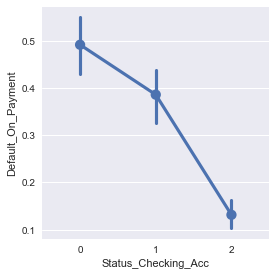

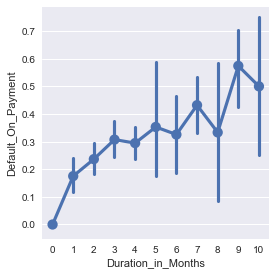

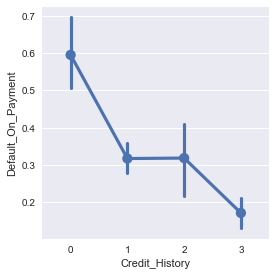

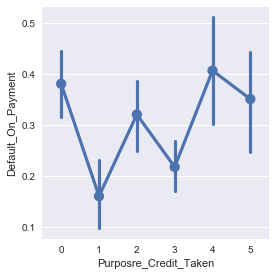

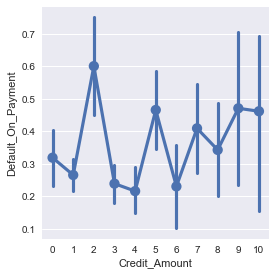

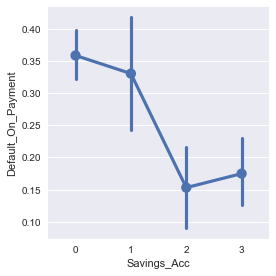

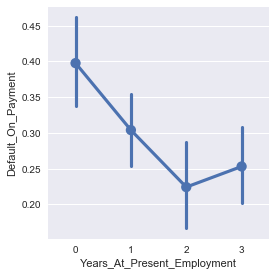

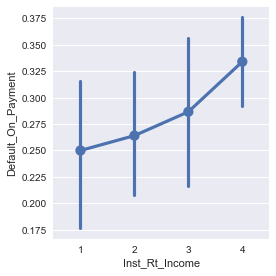

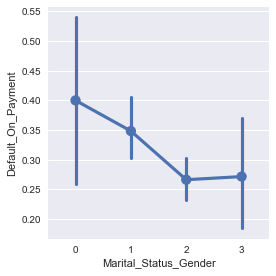

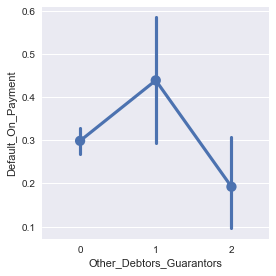

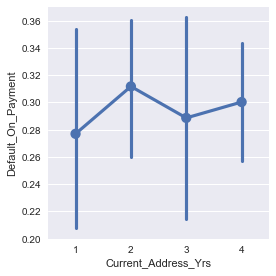

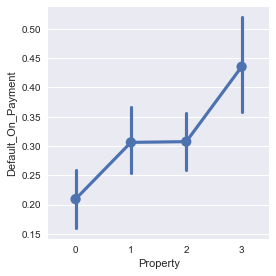

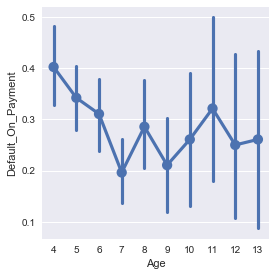

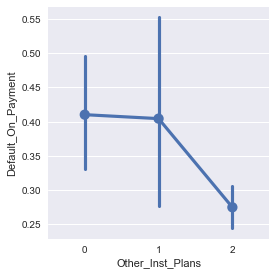

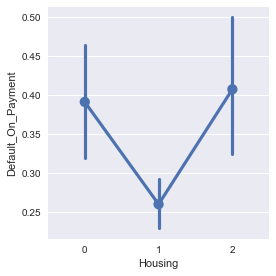

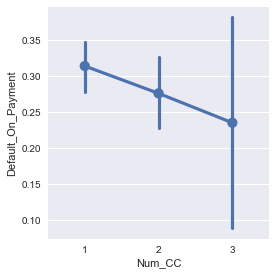

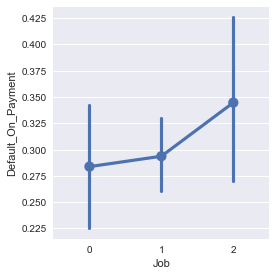

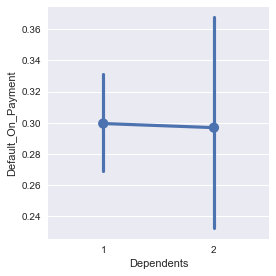

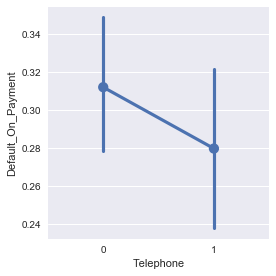

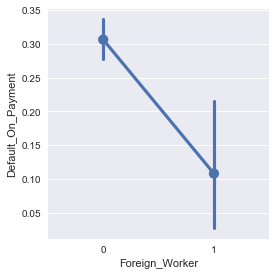

In [18]:
sns.factorplot(x='Status_Checking_Acc',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Duration_in_Months',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Credit_History',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Purposre_Credit_Taken',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Credit_Amount',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Savings_Acc',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Years_At_Present_Employment',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Inst_Rt_Income',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Marital_Status_Gender',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Other_Debtors_Guarantors',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Current_Address_Yrs',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Property',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Age',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Other_Inst_Plans',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Housing',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Num_CC',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Job',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Dependents',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Telephone',y='Default_On_Payment',data=x)
plt.show()

sns.factorplot(x='Foreign_Worker',y='Default_On_Payment',data=x)
plt.show()

**Drop some variables that do not look like potential predictors at all:**

In [19]:
del x['Current_Address_Yrs']
del x['Num_CC']
del x['Dependents']
del x['Telephone']

 **Now we are ready to train our model. We create new series y for target variable "Default_On_Payment", eliminate useless variable "Count" from x, and transform x and y to numpy arrays:**

In [20]:
y = x['Default_On_Payment']
del x['Default_On_Payment']
del x['Count']

x = np.array(x)
y = np.array(y)

**We initialize the accuracies of the various models for the various runs.**

In [21]:
train_accuracy_log = np.zeros(num_runs)
cv_accuracy_log = np.zeros(num_runs)

train_accuracy_neur = np.zeros(num_runs)
cv_accuracy_neur = np.zeros(num_runs)

train_accuracy_randfor = np.zeros(num_runs)
cv_accuracy_randfor = np.zeros(num_runs)

**We split randomly the whole dataset into a train set and a cross-validation set. The first is used to train the model in predicting default, the second is used to check the accuracy of the model on unseen examples. What we want to optimize is the accuracy on the cross-validation set, this is what quantifies how well the model performs in predicting default. We will use various models: logistic regression, neural networks, random forests and extreme gradient boosting, implemented through python library scikit-learn. The splitting procedure and the model training is repeated a certain number of times (10, in this case), and then the accuracies are averaged. This reduces the uncertainty on the calculated accuracies.**

In [26]:
for kk in range(num_runs):    
        
    ## select randomly training and cross validation datasets
    x_tr, x_cv, y_tr, y_cv = train_test_split(x, y, test_size=num_cv/(num_train+num_cv), random_state=None)
    
    
    # normalize independent variables to mean = 0 and std = 1    
    xtrNorm = np.zeros(x_tr.shape)
    for k in range(x_tr.shape[1]):
        xtrNorm[:,k] = (x_tr[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
    
    xcvNorm = np.zeros(x_cv.shape)
    for k in range(x_cv.shape[1]): 
        xcvNorm[:,k] = (x_cv[:,k] - np.mean(x_tr[:,k])) / np.std(x_tr[:,k])
            
    x_cv = xcvNorm
    x_tr = xtrNorm     

    y_tr = np.squeeze(y_tr)
    y_cv = np.squeeze(y_cv)
    
    
    ##########################################
    ## Logistic regression using only linear features
    ##########################################
    
    clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1,
                             fit_intercept=True, intercept_scaling=100, class_weight=None,
                             random_state=None, solver='liblinear', max_iter=100,
                             multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
    clf.fit(x_tr, y_tr)
    
    pred_tr = clf.predict(x_tr)
    pred_cv = clf.predict(x_cv)
    
    # Compute accuracy on training set
    train_accuracy_log[kk] = np.mean(pred_tr == y_tr) * 100
    
    # Compute accuracy on cross-validation set
    cv_accuracy_log[kk] = np.mean(pred_cv == y_cv) * 100

    
    ##########################################
    ## Neural network
    ##########################################
    
    clf = MLPClassifier(solver='lbfgs', alpha=20, hidden_layer_sizes=(8,5), random_state=1)
   
    clf.fit(x_tr, y_tr)
    
    pred_tr = clf.predict(x_tr)
    pred_cv = clf.predict(x_cv)
    
    # Compute accuracy on training set
    train_accuracy_neur[kk] = np.mean(pred_tr == y_tr) * 100
    
    # Compute accuracy on cross-validation set
    cv_accuracy_neur[kk] = np.mean(pred_cv == y_cv) * 100
       
    
    ##########################################
    ## Random forest
    ##########################################
    
    clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=6, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None,
                           verbose=0, warm_start=False, class_weight=None)
    clf.fit(x_tr, y_tr)
    
    pred_tr = clf.predict(x_tr)
    pred_cv = clf.predict(x_cv)
    
    # Compute accuracy on training set
    train_accuracy_randfor[kk] = np.mean(pred_tr == y_tr) * 100
    
    # Compute accuracy on cross-validation set
    cv_accuracy_randfor[kk] = np.mean(pred_cv == y_cv) * 100
    
    
    ##########################################
    ## xgboost
    ##########################################
    
    #clf = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
    clf = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.015, gamma=0.9)
    clf.fit(x_tr, y_tr)
    
    pred_tr = clf.predict(x_tr)
    pred_cv = clf.predict(x_cv)
    
    # Compute accuracy on training set
    train_accuracy_xgboost[kk] = np.mean(pred_tr == y_tr) * 100
    
    # Compute accuracy on cross-validation set
    cv_accuracy_xgboost[kk] = np.mean(pred_cv == y_cv) * 100
        
     

# display mean accuracies and their standard deviations for logistic regression
print("\nAverage train accuracy for logistic regression: %f" % np.mean(train_accuracy_log))
print("with standard deviation of the mean: %f\n" % (np.std(train_accuracy_log) / np.sqrt(num_runs)))
print("Average cross validation accuracy for logistic regression: %f" % np.mean(cv_accuracy_log))
print("with standard deviation of the mean: %f\n" % (np.std(cv_accuracy_log) / np.sqrt(num_runs)))

# display mean accuracies and their standard deviations for neural network
print("\nAverage train accuracy for neural network: %f" % np.mean(train_accuracy_neur))
print("with standard deviation of the mean: %f\n" % (np.std(train_accuracy_neur) / np.sqrt(num_runs)))
print("Average cross validation accuracy for neural network: %f" % np.mean(cv_accuracy_neur))
print("with standard deviation of the mean: %f\n" % (np.std(cv_accuracy_neur) / np.sqrt(num_runs)))

# display mean accuracies and their standard deviations for random forests
print("\nAverage train accuracy for random forests: %f" % np.mean(train_accuracy_randfor))
print("with standard deviation of the mean: %f\n" % (np.std(train_accuracy_randfor) / np.sqrt(num_runs)))
print("Average cross validation accuracy for random forests: %f" % np.mean(cv_accuracy_randfor))
print("with standard deviation of the mean: %f\n" % (np.std(cv_accuracy_randfor) / np.sqrt(num_runs)))

# display mean accuracies and their standard deviations for extreme gradient boosting
print("\nAverage train accuracy for xgb: %f" % np.mean(train_accuracy_xgboost))
print("with standard deviation of the mean: %f\n" % (np.std(train_accuracy_xgboost) / np.sqrt(num_runs)))
print("Average cross validation accuracy for xgb: %f" % np.mean(cv_accuracy_xgboost))
print("with standard deviation of the mean: %f\n" % (np.std(cv_accuracy_xgboost) / np.sqrt(num_runs))) 



Average train accuracy for logistic regression: 77.287500
with standard deviation of the mean: 0.209948

Average cross validation accuracy for logistic regression: 76.000000
with standard deviation of the mean: 0.628490


Average train accuracy for neural network: 78.475000
with standard deviation of the mean: 0.329678

Average cross validation accuracy for neural network: 76.350000
with standard deviation of the mean: 0.561471


Average train accuracy for random forests: 83.250000
with standard deviation of the mean: 0.227074

Average cross validation accuracy for random forests: 74.850000
with standard deviation of the mean: 0.748498


Average train accuracy for xgb: 82.975000
with standard deviation of the mean: 0.185236

Average cross validation accuracy for xgb: 74.600000
with standard deviation of the mean: 0.627694

